# Biodiversity in National Parks
## Objectives: 
Given the dataset about species observations in four National Parks, this project's objective is to analyse the dataset to answer the questions about the biodiversity and visualize the insights of dataset to communicate to the audience.


In [130]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# set to display dataframe's rows without truncating
pd.set_option('display.max_rows', None)
# set fontsize for all plots
plt.rcParams['font.size'] = 14

## Import Data
There were two downloaded csv files which have one same column name, scientific_name, and other details as follows:
- *observations.csv*
    - scientific_name -  a scientific name or species' name 
    - park_name - a National Park's name in which that species found
    - observations - the quantity of that species
- *species_info.csv*
    - category - the category in which the species is
    - scientific_name - a scientific name or species' name
    - common_name - common names of that species
    - conservation_status - the conservation status of that species such as 'threatened' and 'endangered'


In [131]:
# load data
observations = pd.read_csv("observations.csv")
species_info = pd.read_csv("species_info.csv")

## Cleaning Data

In [132]:
# see the first five rows of the observations dataframe
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [133]:
# check data size
observations.shape

(23296, 3)

In [134]:
# check duplicated rows
dup = observations[observations.duplicated(keep=False)]
dup.sort_values('scientific_name')

,scientific_name,park_name,observations
513,Arctium minus,Yosemite National Park,162
10674,Arctium minus,Yosemite National Park,162
4527,Botrychium virginianum,Yellowstone National Park,232
20294,Botrychium virginianum,Yellowstone National Park,232
19392,Cichorium intybus,Yellowstone National Park,266
14142,Cichorium intybus,Yellowstone National Park,266
7263,Echinochloa crus-galli,Great Smoky Mountains National Park,62
1454,Echinochloa crus-galli,Great Smoky Mountains National Park,62
1020,Eleocharis palustris,Great Smoky Mountains National Park,62
12381,Eleocharis palustris,Great Smoky Mountains National Park,62


In [135]:
# drop duplicated rows
observations = observations.drop_duplicates()
observations.shape

(23281, 3)

In [136]:
# check duplicated rows which have the same scientific_name and park_name
dup2 = observations[observations.duplicated(subset=['scientific_name', 'park_name'], keep=False)]
dup2.sort_values(['scientific_name', 'park_name'])

,scientific_name,park_name,observations
3993,Agrostis capillaris,Bryce National Park,103
4864,Agrostis capillaris,Bryce National Park,105
792,Agrostis capillaris,Great Smoky Mountains National Park,84
17428,Agrostis capillaris,Great Smoky Mountains National Park,97
6166,Agrostis capillaris,Yellowstone National Park,241
10379,Agrostis capillaris,Yellowstone National Park,267
7750,Agrostis capillaris,Yosemite National Park,182
17735,Agrostis capillaris,Yosemite National Park,140
6824,Agrostis gigantea,Bryce National Park,104
8676,Agrostis gigantea,Bryce National Park,116


In [137]:
# check dup2's size
dup2.shape

(2199, 3)

In [138]:
# drop duplicates by using the mean of observations to represent the number of observations of a species in the park
observations_cleaned = observations.groupby(['scientific_name', 'park_name'], as_index=False).mean()
observations_cleaned.shape

(22164, 3)

In [139]:
# see the first five rows of the species_info dataframe
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [140]:
# check data size
species_info.shape

(5824, 4)

In [141]:
species_info_cleaned = species_info.drop_duplicates(subset=['category', 'scientific_name'])
species_info_cleaned.shape

(5541, 4)

## Merging Dataframes

In [142]:
df = observations_cleaned.merge(species_info_cleaned, how='left')
df.shape

(22164, 6)

In [143]:
df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Abies bifolia,Bryce National Park,109.0,Vascular Plant,Rocky Mountain Alpine Fir,NaN
1,Abies bifolia,Great Smoky Mountains National Park,72.0,Vascular Plant,Rocky Mountain Alpine Fir,NaN
2,Abies bifolia,Yellowstone National Park,215.0,Vascular Plant,Rocky Mountain Alpine Fir,NaN
3,Abies bifolia,Yosemite National Park,136.0,Vascular Plant,Rocky Mountain Alpine Fir,NaN
4,Abies concolor,Bryce National Park,83.0,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",NaN


In [144]:
# check null values
df.isna().sum()

scientific_name            0
park_name                  0
observations               0
category                   0
common_names               0
conservation_status    21452
dtype: int64

In [145]:
# get an overview of the column 'observations'
df.observations.describe()

count    22164.000000
mean       142.314654
std         69.805762
min          9.000000
25%         86.000000
50%        124.000000
75%        195.000000
max        321.000000
Name: observations, dtype: float64

In [146]:
# select only categorical columns
cat_cols = df.select_dtypes(include='object')

# get overviews of the categorical columns
cat_cols.describe()

,scientific_name,park_name,category,common_names,conservation_status
count,22164,22164,22164,22164,712
unique,5541,4,7,5229,4
top,Festuca subverticillata,Yosemite National Park,Vascular Plant,Brachythecium Moss,Species of Concern
freq,4,5541,17048,28,604


There were 5,541 species observed in four national parks. The species could be categorized into seven groups. There were four conservation status excluding null value which were possible to be least concern or data-insufficient or not evaluated. Therefore, the rows that have missing values should be kept.

In [147]:
# check the names of four National Park
df.park_name.unique()

array(['Bryce National Park', 'Great Smoky Mountains National Park',
       'Yellowstone National Park', 'Yosemite National Park'],
      dtype=object)

In [148]:
# check the names of all seven categories of species
df.category.unique()

array(['Vascular Plant', 'Nonvascular Plant', 'Bird', 'Amphibian',
       'Reptile', 'Mammal', 'Fish'], dtype=object)

In [149]:
# check the conservation status
df.conservation_status.unique()

array([nan, 'Species of Concern', 'Threatened', 'Endangered',
       'In Recovery'], dtype=object)

# Goals
After exploring the dataset, I divided aspects of exploring into two aspects. The first aspect is the biodiversity which depends on diversity of "species". The second is the quantity of lives which regard to numbers of observations. All the questions of interest are as followings:
### Biodiversity
- How was the diversity of species grouped by category and by park?
- How were the diversities of species grouped by category in each National Park?
- What is the percentage of animals grouped by conservation status?
- Which animal categories are in conservation status of species of concern, endangered, and threatened?
- Top n species under conservations in a given park 
- Overall top n species under conservations 

### Observations
- The most common species found in each categories
- How many animals grouped by categories were in each National Park?
- Distribution of observations by category
- Distribution of observations by National Park
- Top n species that have the least number of observations given conservations status


In [150]:
categories = ['Vascular Plant', 'Mammal', 'Bird', 'Nonvascular Plant', 'Amphibian', 'Reptile', 'Fish']

# set custom color palette for maintaining the same color for the same category
category_palette = {'Vascular Plant' : '#66c2a5','Mammal' : '#fc8d62', 'Fish' : '#a6cee3', 'Amphibian' : '#e78ac3', 'Nonvascular Plant' : '#a6d854', 'Reptile' : '#ffd92f','Bird' : '#e5c494'}

# Exploring Biodiversity
Biodiversity is based on the variety of life. For this reason, the number of species was concerned in the investigation.

In [151]:
# create a sorted dataframe of number of scientific_name by categories
species_by_category = df.groupby(['category']).scientific_name.nunique().reset_index(name='species_num')
sorted_category = species_by_category.sort_values('species_num', ascending=False)
sorted_category

,category,species_num
6,Vascular Plant,4262
1,Bird,488
4,Nonvascular Plant,333
3,Mammal,176
2,Fish,125
0,Amphibian,79
5,Reptile,78


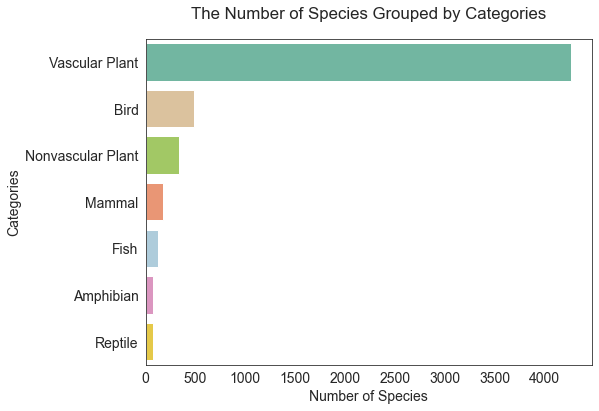

In [184]:
# create a bar chart of the number of species grouped by categories
# create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# plot data
ax = sns.barplot(x='species_num', y='category', data=sorted_category, palette=category_palette)

#provide informative labels
ax.set_title("The Number of Species Grouped by Categories",pad=20)
ax.set_xlabel("Number of Species")
ax.set_ylabel("Categories")
plt.show()

In [153]:
# create a sorted dataframe of number of scientific_name by park_name
species_by_park = df.groupby(['park_name']).scientific_name.nunique().reset_index(name='species_num')
sorted_species_by_park = species_by_park.sort_values('species_num', ascending=False)
sorted_species_by_park

,park_name,species_num
0,Bryce National Park,5541
1,Great Smoky Mountains National Park,5541
2,Yellowstone National Park,5541
3,Yosemite National Park,5541


Overall, vascular plants had the greatest number of species (4,262 species) found in National Parks. Birds and nonvascular plants ranked in the second and the third places (488 species and 333 species rescpectively). All four parks has the very same number of species.

In [154]:
# create a bar chart of the number of species grouped by categories in each park
species_count_at_park = df.groupby(['park_name', 'category']).scientific_name.count().reset_index()
species_count_at_park

,park_name,category,scientific_name
0,Bryce National Park,Amphibian,79
1,Bryce National Park,Bird,488
2,Bryce National Park,Fish,125
3,Bryce National Park,Mammal,176
4,Bryce National Park,Nonvascular Plant,333
5,Bryce National Park,Reptile,78
6,Bryce National Park,Vascular Plant,4262
7,Great Smoky Mountains National Park,Amphibian,79
8,Great Smoky Mountains National Park,Bird,488
9,Great Smoky Mountains National Park,Fish,125


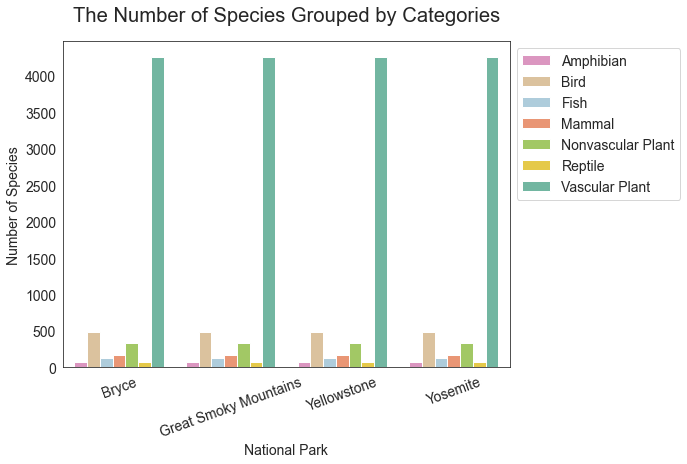

In [155]:
# create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# plot data
ax = sns.barplot(x='park_name', y='scientific_name', hue = 'category', data=species_count_at_park, palette=category_palette)

#provide informative labels
ax.set_title("The Number of Species Grouped by Categories", fontsize='x-large',pad=20)
ax.set_xlabel("National Park")
ax.legend(loc = 'upper left',bbox_to_anchor=[1, 1])
ax.set_xticklabels(['Bryce', 'Great Smoky Mountains', 'Yellowstone', 'Yosemite'], rotation=20)
ax.set_ylabel("Number of Species")
plt.show()

From the preceding bar chart, there was no diffence between the numbers of species found in each National Park.

## Conservation Status
As said earlier that there are a lot of rows that have null value in the conservation status column, those null values are assumed to be null because they were not in concern.

In [156]:
# create a sorted dataframe which count the number of species regarding its conservation status
sorted_status = df.groupby('conservation_status', dropna=False).scientific_name.nunique().reset_index(name='species_num')
sorted_status = sorted_status
sorted_status

,conservation_status,species_num
0,Endangered,15
1,In Recovery,3
2,Species of Concern,151
3,Threatened,9
4,NaN,5363


In [157]:
# calculate the percentage of species_num in conservation_status and the rest
conserved_pct = (15+3+151+9)/5541
non_conserved_pct = 5363/5541

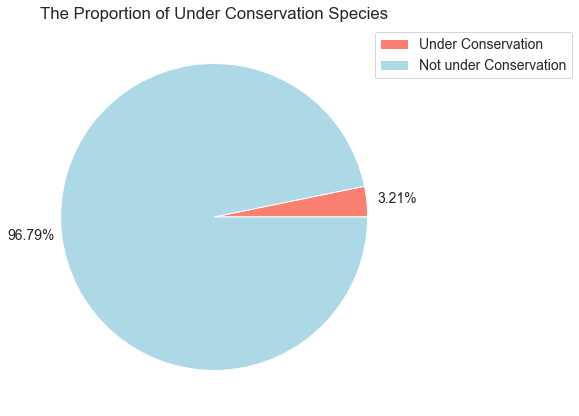

In [185]:
fig,ax = plt.subplots(figsize=(8,6))

ax = plt.pie([conserved_pct, non_conserved_pct], autopct='%0.2f%%', pctdistance=1.2, colors=['salmon', 'lightblue'])
plt.title("The Proportion of Under Conservation Species")
plt.legend(['Under Conservation', 'Not under Conservation'], bbox_to_anchor = [0.9,1])
plt.tight_layout()
plt.show()

There were only 3.21% of 5,541 species that were under conservations status. 

In [159]:
# drop null values in sorted_status
sorted_status = sorted_status.dropna().reset_index(drop=True)

# create categorical order for conservation_status column
conservation_order = ['In Recovery', 'Species of Concern', 'Threatened', 'Endangered']
sorted_status['conservation_status'] = pd.Categorical(sorted_status['conservation_status'], ordered=True, categories=conservation_order)
sorted_status.conservation_status.dtypes

CategoricalDtype(categories=['In Recovery', 'Species of Concern', 'Threatened',
                  'Endangered'],
, ordered=True)

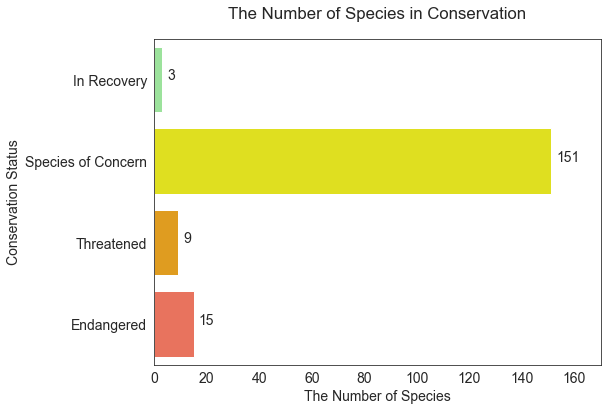

In [186]:
# create figure and axe object
fig, ax = plt.subplots(figsize=(8, 6))

# set conservation_color
conservation_palette = {'In Recovery' : 'lightgreen', 'Species of Concern': 'yellow', 'Threatened' : 'orange', 'Endangered' : 'tomato'}

# sort sorted_status by categorical order
sorted_status_by_cat = sorted_status.sort_values('conservation_status').reset_index(drop=True)

# plot data from sorted_status_by_cat
ax = sns.barplot(data=sorted_status_by_cat, x='species_num', y='conservation_status', palette=conservation_palette)


# provide informative labels
ax.set_title("The Number of Species in Conservation", pad=20)
ax.set_xlabel("The Number of Species")
ax.set_ylabel("Conservation Status")
ax.set_xlim([0,170])
# set bar value
for index, row in sorted_status_by_cat.iterrows():
    ax.text(row.species_num+2, index, str(row.species_num))
    
plt.show()

There were 151 species of concern, 9 species threatened, 15 species endangered, and 3 species in recovery.

In [161]:
# create a dataframe for conservation_status group by category
status_category = df.groupby(['conservation_status', 'category']).scientific_name.nunique().reset_index(name='species_num')
status_category

,conservation_status,category,species_num
0,Endangered,Amphibian,1
1,Endangered,Bird,4
2,Endangered,Fish,3
3,Endangered,Mammal,6
4,Endangered,Vascular Plant,1
5,In Recovery,Bird,3
6,Species of Concern,Amphibian,4
7,Species of Concern,Bird,68
8,Species of Concern,Fish,4
9,Species of Concern,Mammal,22


In [162]:
# pivot the table in order to create stacked bar charts
status_category = status_category.pivot(index='conservation_status', columns='category', values='species_num')
status_category = status_category.reindex(conservation_order)
status_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
In Recovery,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,NaN,3.0,2.0,NaN,NaN,2.0
Endangered,1.0,4.0,3.0,6.0,NaN,NaN,1.0


<Figure size 576x432 with 0 Axes>

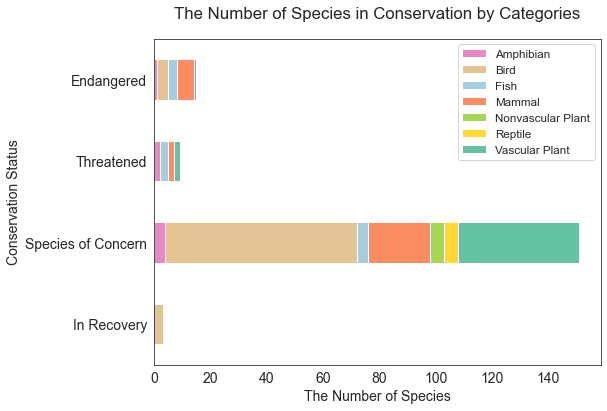

In [214]:
# to set seaborn style for pandas bar plot
sns.set_style("white")

# create a figure
fig= plt.figure(figsize=(8,6))

# plot data from status_category dataframe
ax = status_category.plot.barh(stacked=True, figsize=(8,6), color=category_palette)

# provide informative labels
ax.set_title("The Number of Species in Conservation by Categories", pad=20)
ax.set_xlabel("The Number of Species")
ax.set_ylabel("Conservation Status")
plt.legend(fontsize='small')
plt.show()

The diagram above gave us a brief understanding about the number of species in conservations by categories. Birds and vascular plants were the majority of species of concern. Moreover, most of the endangered group were mammals and birds.

## Top n Species under Conservations at the Given Park

To know more about top n species in each conservation status in each park, the function top_n_status was created to shows a list of conserved species that had less number of observations.


In [164]:
def top_n_status(n, status, park_name,df):
    park_status_data = df[(df.park_name == park_name) & (df.conservation_status == status)] 
    sorted_data = park_status_data.sort_values('observations')
    return sorted_data.head(n)

top_n_status(3, 'Endangered', 'Great Smoky Mountains National Park',df )

,scientific_name,park_name,observations,category,common_names,conservation_status
16989,Rana sierrae,Great Smoky Mountains National Park,11.0,Amphibian,Sierra Nevada Yellow-Legged Frog,Endangered
3221,Canis rufus,Great Smoky Mountains National Park,13.0,Mammal,Red Wolf,Endangered
9293,Grus americana,Great Smoky Mountains National Park,13.0,Bird,Whooping Crane,Endangered


In [165]:
top_n_status(5, 'Endangered', 'Bryce National Park',df )

,scientific_name,park_name,observations,category,common_names,conservation_status
21424,Vermivora bachmanii,Bryce National Park,20.0,Bird,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
13576,Noturus baileyi,Bryce National Park,22.0,Fish,Smoky Madtom,Endangered
13968,Ovis canadensis sierrae,Bryce National Park,22.0,Mammal,Sierra Nevada Bighorn Sheep,Endangered
4824,Chasmistes liorus,Bryce National Park,23.0,Fish,June Sucker,Endangered
9292,Grus americana,Bryce National Park,24.0,Bird,Whooping Crane,Endangered


In [177]:
top_n_status(5, 'Endangered', 'Yellowstone National Park',df )

,scientific_name,park_name,observations,category,common_names,conservation_status
9294,Grus americana,Yellowstone National Park,57.0,Bird,Whooping Crane,Endangered
21426,Vermivora bachmanii,Yellowstone National Park,58.0,Bird,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
3222,Canis rufus,Yellowstone National Park,60.0,Mammal,Red Wolf,Endangered
16990,Rana sierrae,Yellowstone National Park,60.0,Amphibian,Sierra Nevada Yellow-Legged Frog,Endangered
9094,Geum radiatum,Yellowstone National Park,63.0,Vascular Plant,"Mountain Avens, Spreading Avens",Endangered


## Overall Top n Species under Conservations
In order to survey the number of lives under conservations of *all National Parks*, **overall_top_n_status** was created to depict the species within conservation status and had least number of observations. 

In [166]:
def overall_top_n_status(n, status, df):
    status = df[df.conservation_status == status]
    obs_by_species = status.groupby('scientific_name').observations.sum().reset_index()
    obs_by_species = obs_by_species.sort_values('observations')
    top_n_species = obs_by_species.scientific_name.values[:n]
    filter_func = lambda x : x in top_n_species
    top_n_data = df.loc[df.scientific_name.apply(filter_func)]
    pivoted_top_n_data = top_n_data.pivot_table(index=['scientific_name', 'common_names', 'category'], columns = 'park_name', values='observations', aggfunc = np.sum, margins=True)
    pivoted_top_n_data.style.set_properties(**{'text-align': 'center'})
    return pivoted_top_n_data

overall_top_n_status(5, 'Threatened', df)

,,park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,All
scientific_name,common_names,category,,,,,
Anaxyrus canorus,Yosemite Toad,Amphibian,43.0,30.0,114.0,87.0,274.0
Erimonax monachus,Spotfin Chub,Fish,46.0,18.0,109.0,69.0,242.0
Isotria medeoloides,Small Whorled Pogonia,Vascular Plant,42.0,36.0,114.0,82.0,274.0
Spiraea virginiana,Virginia Spiraea,Vascular Plant,57.0,45.0,114.0,62.0,278.0
Ursus arctos horribilis,Grizzly Bear,Mammal,38.0,50.0,115.0,73.0,276.0
All,,,226.0,179.0,566.0,373.0,1344.0


In [167]:
overall_top_n_status(5, 'Endangered', df)

,,park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,All
scientific_name,common_names,category,,,,,
Canis rufus,Red Wolf,Mammal,30.0,13.0,60.0,34.0,137.0
Grus americana,Whooping Crane,Bird,24.0,13.0,57.0,37.0,131.0
Noturus baileyi,Smoky Madtom,Fish,22.0,23.0,67.0,31.0,143.0
Rana sierrae,Sierra Nevada Yellow-Legged Frog,Amphibian,31.0,11.0,60.0,42.0,144.0
Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Bird,20.0,18.0,58.0,45.0,141.0
All,,,127.0,78.0,302.0,189.0,696.0


From both above tables, it is very clear that Great Smokey Mountains National Park had very low number of observations for the top 5 endangered lives. While Yellowstone National Park had the greatest number of obsevations of those endangered species.

In [181]:
top_5_concern = overall_top_n_status(5, 'Species of Concern', df)
top_5_concern

,,park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,All
scientific_name,common_names,category,,,,,
Accipiter striatus,Sharp-Shinned Hawk,Bird,62.0,69.0,200.0,115.0,446.0
Buteo lineatus,Red-Shouldered Hawk,Bird,85.0,31.0,224.0,109.0,449.0
Cathartes aura,Turkey Vulture,Bird,49.0,47.0,237.0,115.0,448.0
Certhia americana,Brown Creeper,Bird,79.0,63.0,189.0,115.0,446.0
Phalacrocorax auritus,Double-Crested Cormorant,Bird,61.0,45.0,218.0,117.0,441.0
All,,,336.0,255.0,1068.0,571.0,2230.0


## Exploring Observations
### Finding the most common species by category
The function **top_n_obs_by_cat** is for answering a question about lives that have the greatest numbers of population. Moreover, it might be good to monitor to prevent overbreeding.

In [169]:
def top_n_obs_by_cat(n, category_name, df):
    data_by_cat = df[df.category == category_name]
    sum_by_species = data_by_cat.groupby(['scientific_name']).observations.sum().reset_index()
    sorted_data = sum_by_species.sort_values(['observations'],ascending = False).reset_index(drop = True)
    return sorted_data.head(n)
    
top_n_obs_by_cat(3, 'Fish', df )

,scientific_name,observations
0,Notropis baileyi,670.0
1,Notropis rubricroceus,664.0
2,Prosopium williamsoni,655.0


In [170]:
top_n_obs_by_cat(3, 'Mammal', df)

,scientific_name,observations
0,Bison bison,700.0
1,Lasiurus borealis,678.0
2,Sorex dispar,665.0


## The number of Observations in Each National Park


In [171]:
obs_by_cat = df.groupby(['park_name', 'category']).observations.sum().reset_index()
obs_by_cat['observations_k'] = obs_by_cat['observations'] / 1000
obs_by_cat

,park_name,category,observations,observations_k
0,Bryce National Park,Amphibian,7.299000e+03,7.299000
1,Bryce National Park,Bird,4.838883e+04,48.388833
2,Bryce National Park,Fish,1.222300e+04,12.223000
3,Bryce National Park,Mammal,1.683133e+04,16.831333
4,Bryce National Park,Nonvascular Plant,3.299200e+04,32.992000
5,Bryce National Park,Reptile,7.854500e+03,7.854500
6,Bryce National Park,Vascular Plant,4.226347e+05,422.634667
7,Great Smoky Mountains National Park,Amphibian,5.622500e+03,5.622500
8,Great Smoky Mountains National Park,Bird,3.529917e+04,35.299167
9,Great Smoky Mountains National Park,Fish,9.068000e+03,9.068000


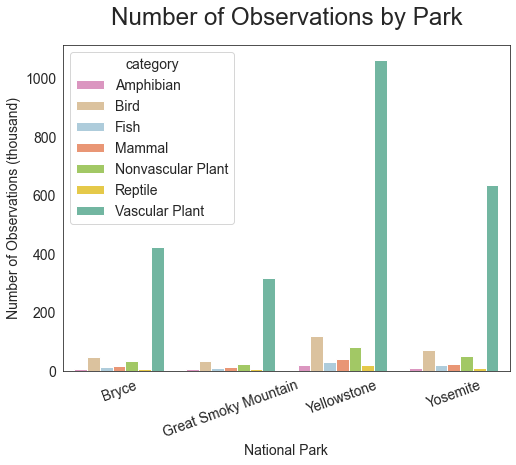

In [172]:
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(data=obs_by_cat, x='park_name', y='observations_k', hue='category', palette = category_palette)
ax.set_ylabel("Number of Observations (thousand)")
ax.set_xlabel("National Park")
ax.set_xticklabels(['Bryce', 'Great Smoky Mountain', 'Yellowstone', 'Yosemite'], rotation=20)
ax.set_title("Number of Observations by Park", fontsize='xx-large', pad=20)
plt.show()

From the bar chart, Yellowstone National Park had the highest number of observatons in all categories. On the other hand, the number of observations in most categories in Great Smoky Mountains National Park were the lowest.

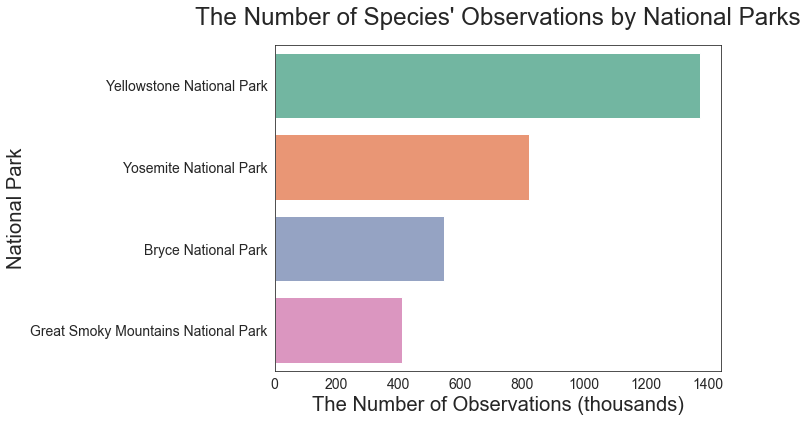

In [173]:
fig, ax = plt.subplots(figsize=(8,6))
park_obs = df.groupby('park_name').observations.sum().reset_index()
park_obs['observations_k'] = park_obs['observations'] /1000
park_obs.sort_values('observations_k', ascending=False, inplace=True)
ax = sns.barplot(data=park_obs, x='observations_k', y='park_name', palette='Set2')
ax.set_title("The Number of Species' Observations by National Parks", fontsize='xx-large', pad=20)
ax.set_xlabel("The Number of Observations (thousands)", fontsize='x-large')
ax.set_ylabel("National Park", fontsize='x-large')
plt.show()

Even though all four National Parks had got the same number of species found, in aspect of quantity, Yellowstone National Park had the highest number of observations at about 1,400 thousand observations. Great Smoky Mountains National Park had the smallest number of total observations.

## Distributions of Observations

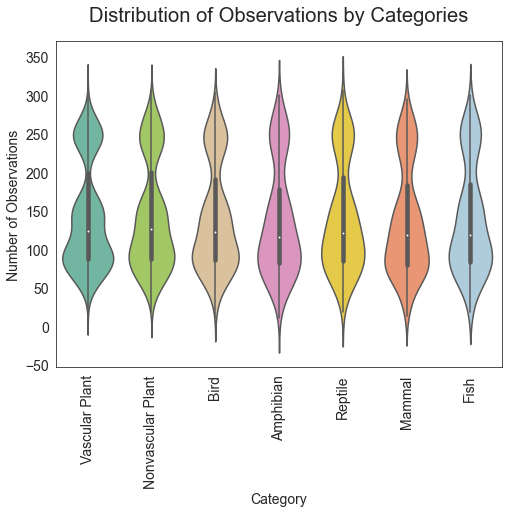

In [200]:
fig = plt.figure(figsize=(8,6))
ax = sns.violinplot(data=df, x='category', y='observations', palette = category_palette)
ax.set_ylabel("Number of Observations")
ax.set_xlabel("Category")
ax.set_xticklabels(['Vascular Plant', 'Nonvascular Plant', 'Bird', 'Amphibian', 'Reptile', 'Mammal', 'Fish'], rotation=90)
ax.set_title("Distribution of Observations by Categories", fontsize='x-large', pad=20)
plt.show()


Even though, the number of species of vascular plants outnumbered the other categories'. Every category had almost the same of observations distributions. Mostly, the number of observations were within just under 350 observations but the average observations were at about 125 observations.

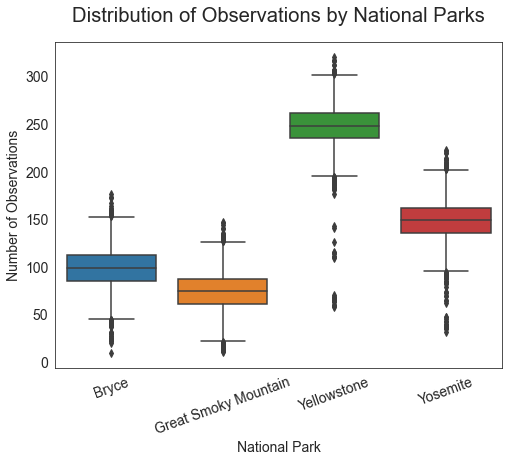

In [201]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.boxplot(data=df, x='park_name', y='observations')
ax.set_ylabel("Number of Observations")
ax.set_xlabel("National Park")
ax.set_xticklabels(['Bryce', 'Great Smoky Mountain', 'Yellowstone', 'Yosemite'], rotation=20)
ax.set_title("Distribution of Observations by National Parks", fontsize='x-large', pad=20)
plt.show()


The above boxplots had confirmed that Yellowstone had the greatest number of observations (at about 250 observations). Yosemite, Bryce and Great Smoky Mountains National Parks had observations number at 150, 100, and 75 observations in turn.

In [189]:
new_df = df
new_df['conservation_status'].fillna('No Status', inplace=True)
new_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Abies bifolia,Bryce National Park,109.0,Vascular Plant,Rocky Mountain Alpine Fir,No Status
1,Abies bifolia,Great Smoky Mountains National Park,72.0,Vascular Plant,Rocky Mountain Alpine Fir,No Status
2,Abies bifolia,Yellowstone National Park,215.0,Vascular Plant,Rocky Mountain Alpine Fir,No Status
3,Abies bifolia,Yosemite National Park,136.0,Vascular Plant,Rocky Mountain Alpine Fir,No Status
4,Abies concolor,Bryce National Park,83.0,Vascular Plant,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",No Status


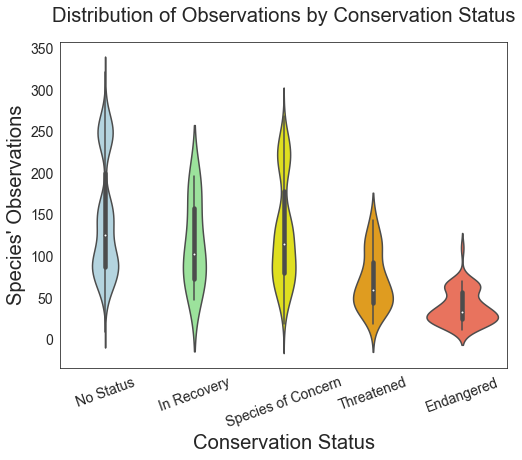

In [202]:
fig,ax = plt.subplots(figsize=(8,6))
conservation_plus_palette = {'No Status': 'lightblue', 'In Recovery' : 'lightgreen', 'Species of Concern': 'yellow', 'Threatened' : 'orange', 'Endangered' : 'tomato'}

ax = sns.violinplot(data=new_df, x='conservation_status', y='observations', palette= conservation_plus_palette,
                    order = ['No Status', 'In Recovery', 'Species of Concern', 'Threatened', 'Endangered'])
ax.set_ylabel("Species' Observations", fontsize='x-large')
ax.set_xlabel("Conservation Status", fontsize='x-large')
ax.set_xticklabels(labels =['No Status', 'In Recovery', 'Species of Concern', 'Threatened', 'Endangered'], rotation = 20)
ax.set_ylabel("Species' Observations", fontsize='x-large')
ax.set_title("Distribution of Observations by Conservation Status", fontsize='x-large', pad=20)
plt.show()

In aspect of conservations status, the evaluation of conservations status may not be considered only by the number of observations. Some species that had very low number may not always be in endangered status. They might be only be species of concern or threatened. However, mostly endangered species had very low number of observation. Average observations of endangered species were around 25 observations/park The other conserved species had higher average of observations regarding its level of conservation status. 

# Summary
1. How was the diversity of species grouped by category and by park?
    - There were 5,541 species found which vascular plants dominated all the species (about 4,200 species). Bird species were the greatest regarding animals.    
    - Each national park had the same number of species found.
    
2. How were the diversities of species grouped by category in each National Park?
    - There was no difference amoung number of species by category in each park
    
3. What is the percentage of animals grouped by conservation status?
    - 3.21% of total species were under conservations - species of concern, threatened, endangered, and in recovery.
    - There were 151 species of concern, 9 species threatened, 15 species endangered, and 3 species in recovery.

4. Which animal categories are in conservation status of species of concern, endangered, and threatened?
    - For lives with species of concern status, the majorities were birds, vascular plants and mammals respectively.
    - Lives that were threatened were amphibians, fish, mammals, and vascular plants (equally)
    - The endangered main categories were mammals, birds, and fish.

5. Top 3 Endangered Species at a national park
    - At Great Smoky Mountains, the first 3 least common species were 1) yellow-legged frog 2) red wolf  3) whooping crane (about 10 observations)
    - At Bryce, the first 3 least common species were 1) Bachman's warbler (bird) 2) smoky madtom (fish) 3) big horn sheep (about 20 observations)

6. Overall top 5 Endangered Species
     - whooping crane, red wold, Bachman's warbler, smoky madtom, yellow-legged frog
     - There were diffence between the number of observations of endangered species in each park. Yellowstone had the greatest number of endangered, while Great Smoky Mountains got the least number of endangered.

7. How many animals grouped by categories were in each National Park?
    - All four parks had almost the same proportions of observations by category, yet the number of observations in Yellowstone was exceedingly high than other national parks. And Great Smoky Mountains had the least number of observations as said before.

8. Distribution of observations by category
    - Every category had almost the same shape and range of observation distribution even though they had distinct number of observations.

9. Distribution of observations by National Park
    - All four national parks had different numbers of lives. Yellowstone had the greatest number of observations (at about 250 observations/species). Yosemite, Bryce and Great Smoky Mountains National Parks had observations number at 150, 100, and 75 observations per species in turn. 

10. Distribution of observations by National Park
    - Average observations of endangered species were around 25 observations/park The other conserved species had higher average of observations regarding its level of conservation status. However, there were other factors being considered to evaluate the conservation status of a species.